In [1]:
!pip3 install pandas numpy scikit-learn seaborn nbformat statsmodels

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
import plotly.express as pl

In [2]:
gemma_7b = pd.read_json("results/gemma-7b-it_output.json")
gemma2_9b = pd.read_json("results/gemma2-9b-it_output.json")
llama3_1_70b = pd.read_json("results/llama-3.1-70b-versatile_output.json")
llama3_1_8b = pd.read_json("results/llama-3.1-8b-instant_output.json")
llama3_70b = pd.read_json("results/llama3-70b-8192_output.json")
llama3_8b = pd.read_json("results/llama3-8b-8192_output.json")
mixtral_8x7b = pd.read_json("results/mixtral-8x7b-32768_output.json")

df = pd.concat([
    gemma_7b,
    gemma2_9b,
    llama3_1_70b,
    llama3_1_8b,
    llama3_70b,
    llama3_8b,
    mixtral_8x7b
])

sns.color_palette("flare", as_cmap=True)

df["expected_role"] = df["expected_role"] == "admin"


In [35]:
df.groupby("model")['perf_counter'].mean()

model
gemma-7b-it                 4.162158
gemma2-9b-it                4.196762
llama-3.1-70b-versatile    28.020820
llama-3.1-8b-instant        2.435548
llama3-70b-8192            11.852101
llama3-8b-8192              1.248029
mixtral-8x7b-32768         17.683539
Name: perf_counter, dtype: float64

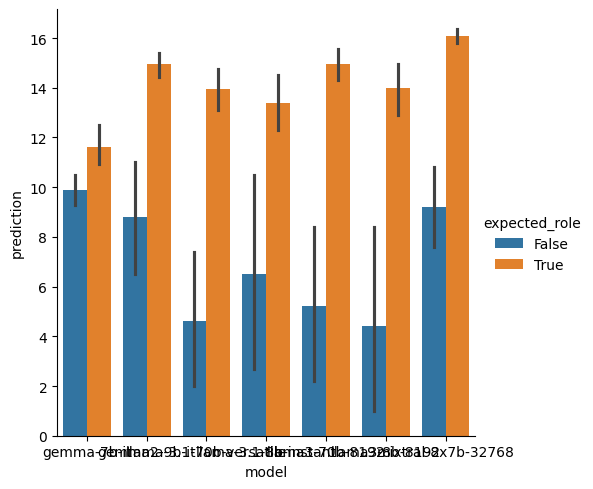

In [77]:
sns.catplot(data=df, kind="bar", x="model", y="prediction", hue="expected_role")

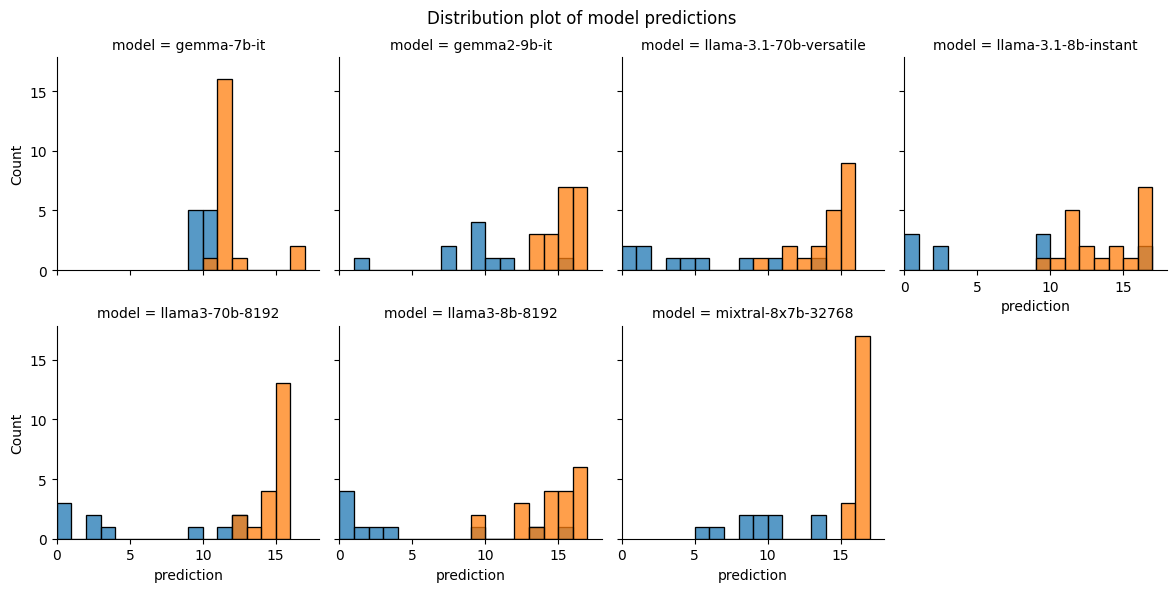

In [70]:
plt = sns.FacetGrid(data=df, col="model",  hue="expected_role", col_wrap=4)

plt.set(xlim=(0,18))

plt.map(sns.histplot, 'prediction', binwidth=1)

plt.fig.suptitle("Distribution plot of model predictions")
plt.fig.subplots_adjust(top=0.90)

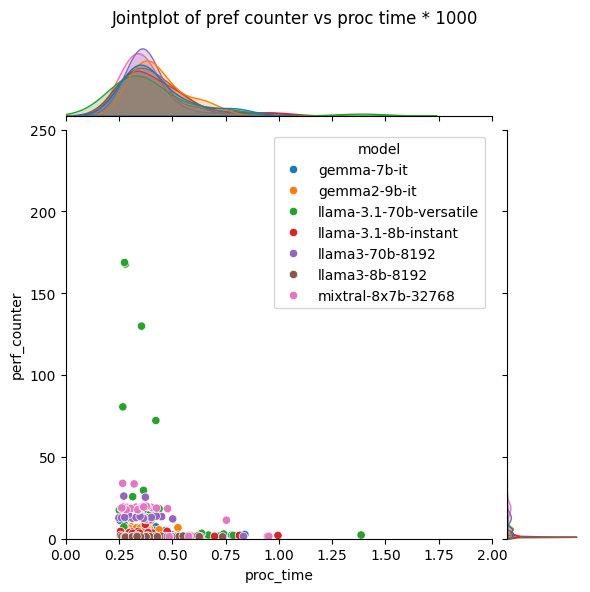

In [67]:
plt = sns.jointplot(data=df, x=df['proc_time']*1000, y="perf_counter", hue="model", xlim=(0,2), ylim=(0,250))

plt.fig.suptitle("Jointplot of pref counter vs proc time * 1000")
plt.fig.subplots_adjust(top=0.92)

/media/HDD/thesis/thesis_data/lib/python3.11/site-packages/numpy/lib/_nanfunctions_impl.py:1650: RuntimeWarning: All-NaN slice encountered
  return fnb._ureduce(a,


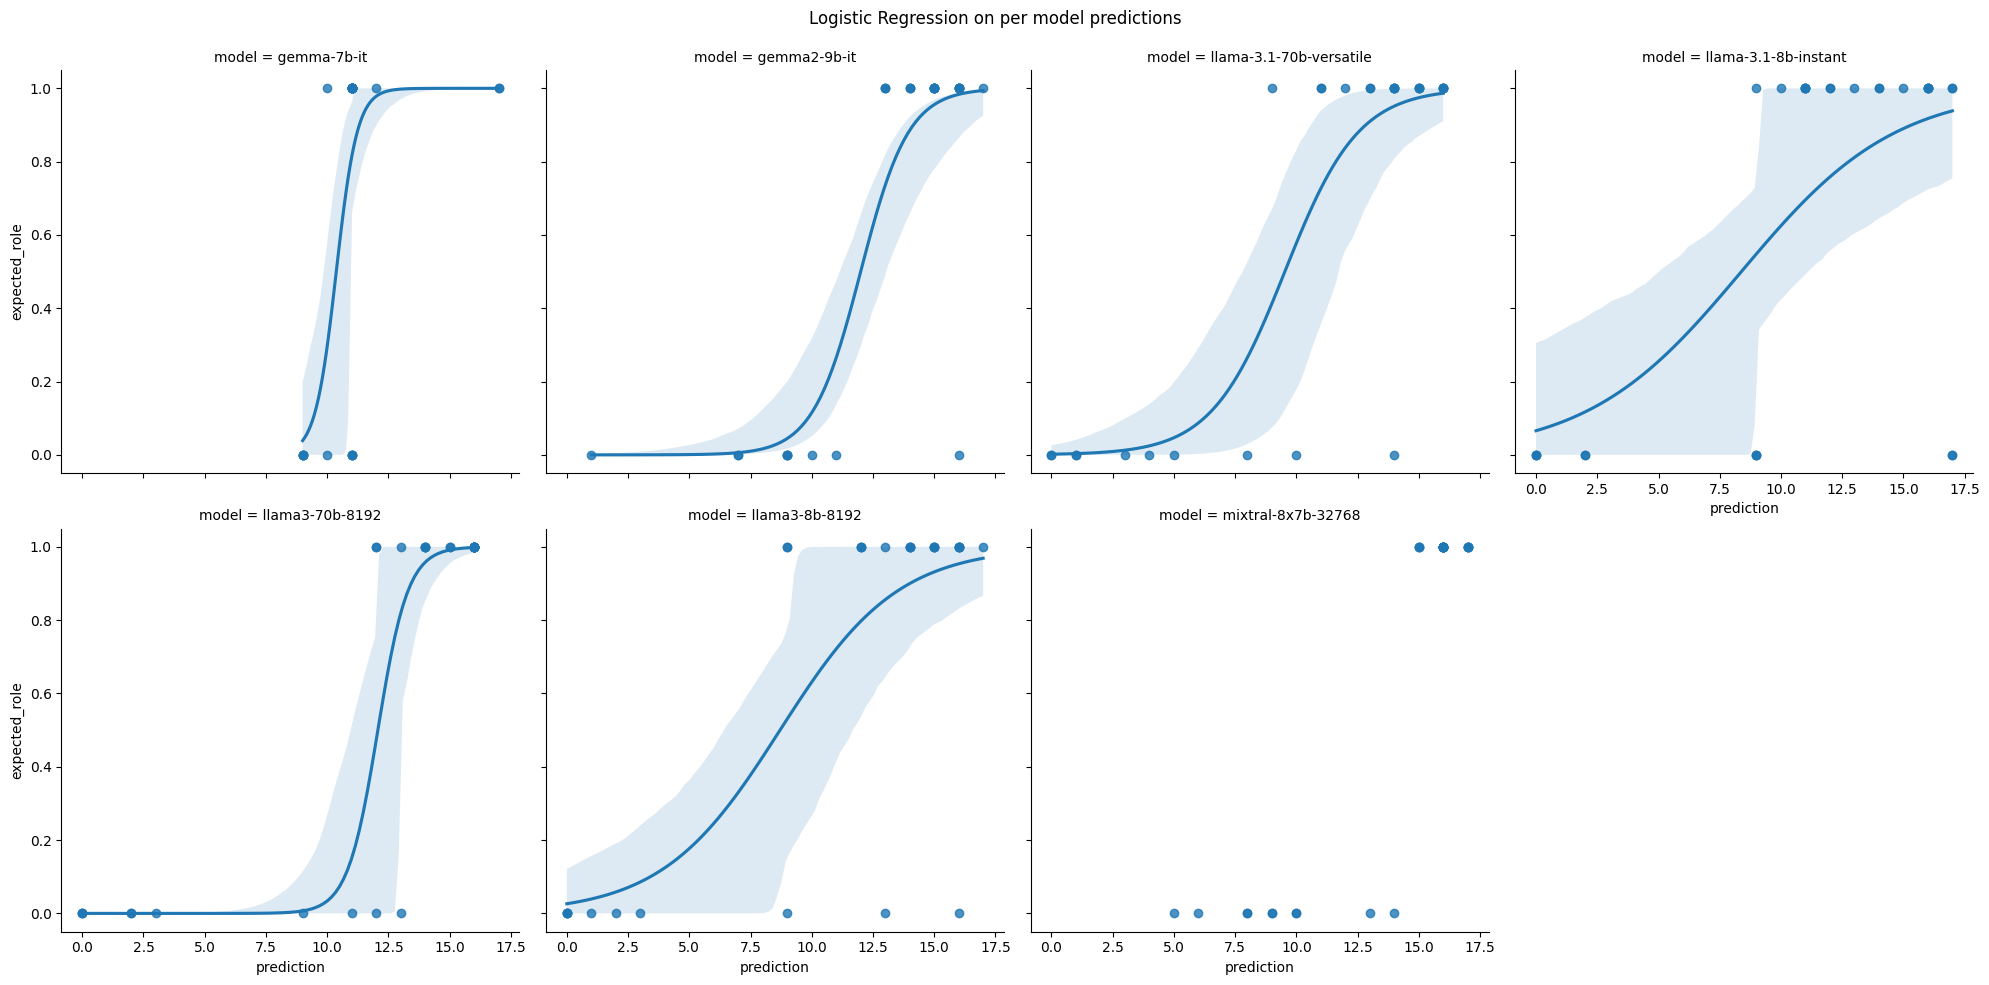

In [58]:
plt = sns.lmplot(data=df, y='expected_role', x='prediction', col="model", col_wrap=4, logistic=True)
plt.fig.suptitle("Logistic Regression on per model predictions")
plt.fig.subplots_adjust(top=0.92)

In [ ]:
sns.regplot(data=df, x="")

In [ ]:
admins = df.loc[df['expected_role'] == role['admin']]
admins# ['prediction'].mean()

In [ ]:

pl.scatter(df, y='expected_role', x='prediction', color='prediction', template='plotly_dark')